In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
df.head(100)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,58.0,1,133,0,60,1,219000.00,1.0,141,1,0,83,0
96,63.0,1,514,1,25,1,254000.00,1.3,134,1,0,83,0
97,70.0,1,59,0,60,0,255000.00,1.1,136,0,0,85,0
98,60.0,1,156,1,25,1,318000.00,1.2,137,0,0,85,0


In [3]:
print(df.describe())
print(df.shape)

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

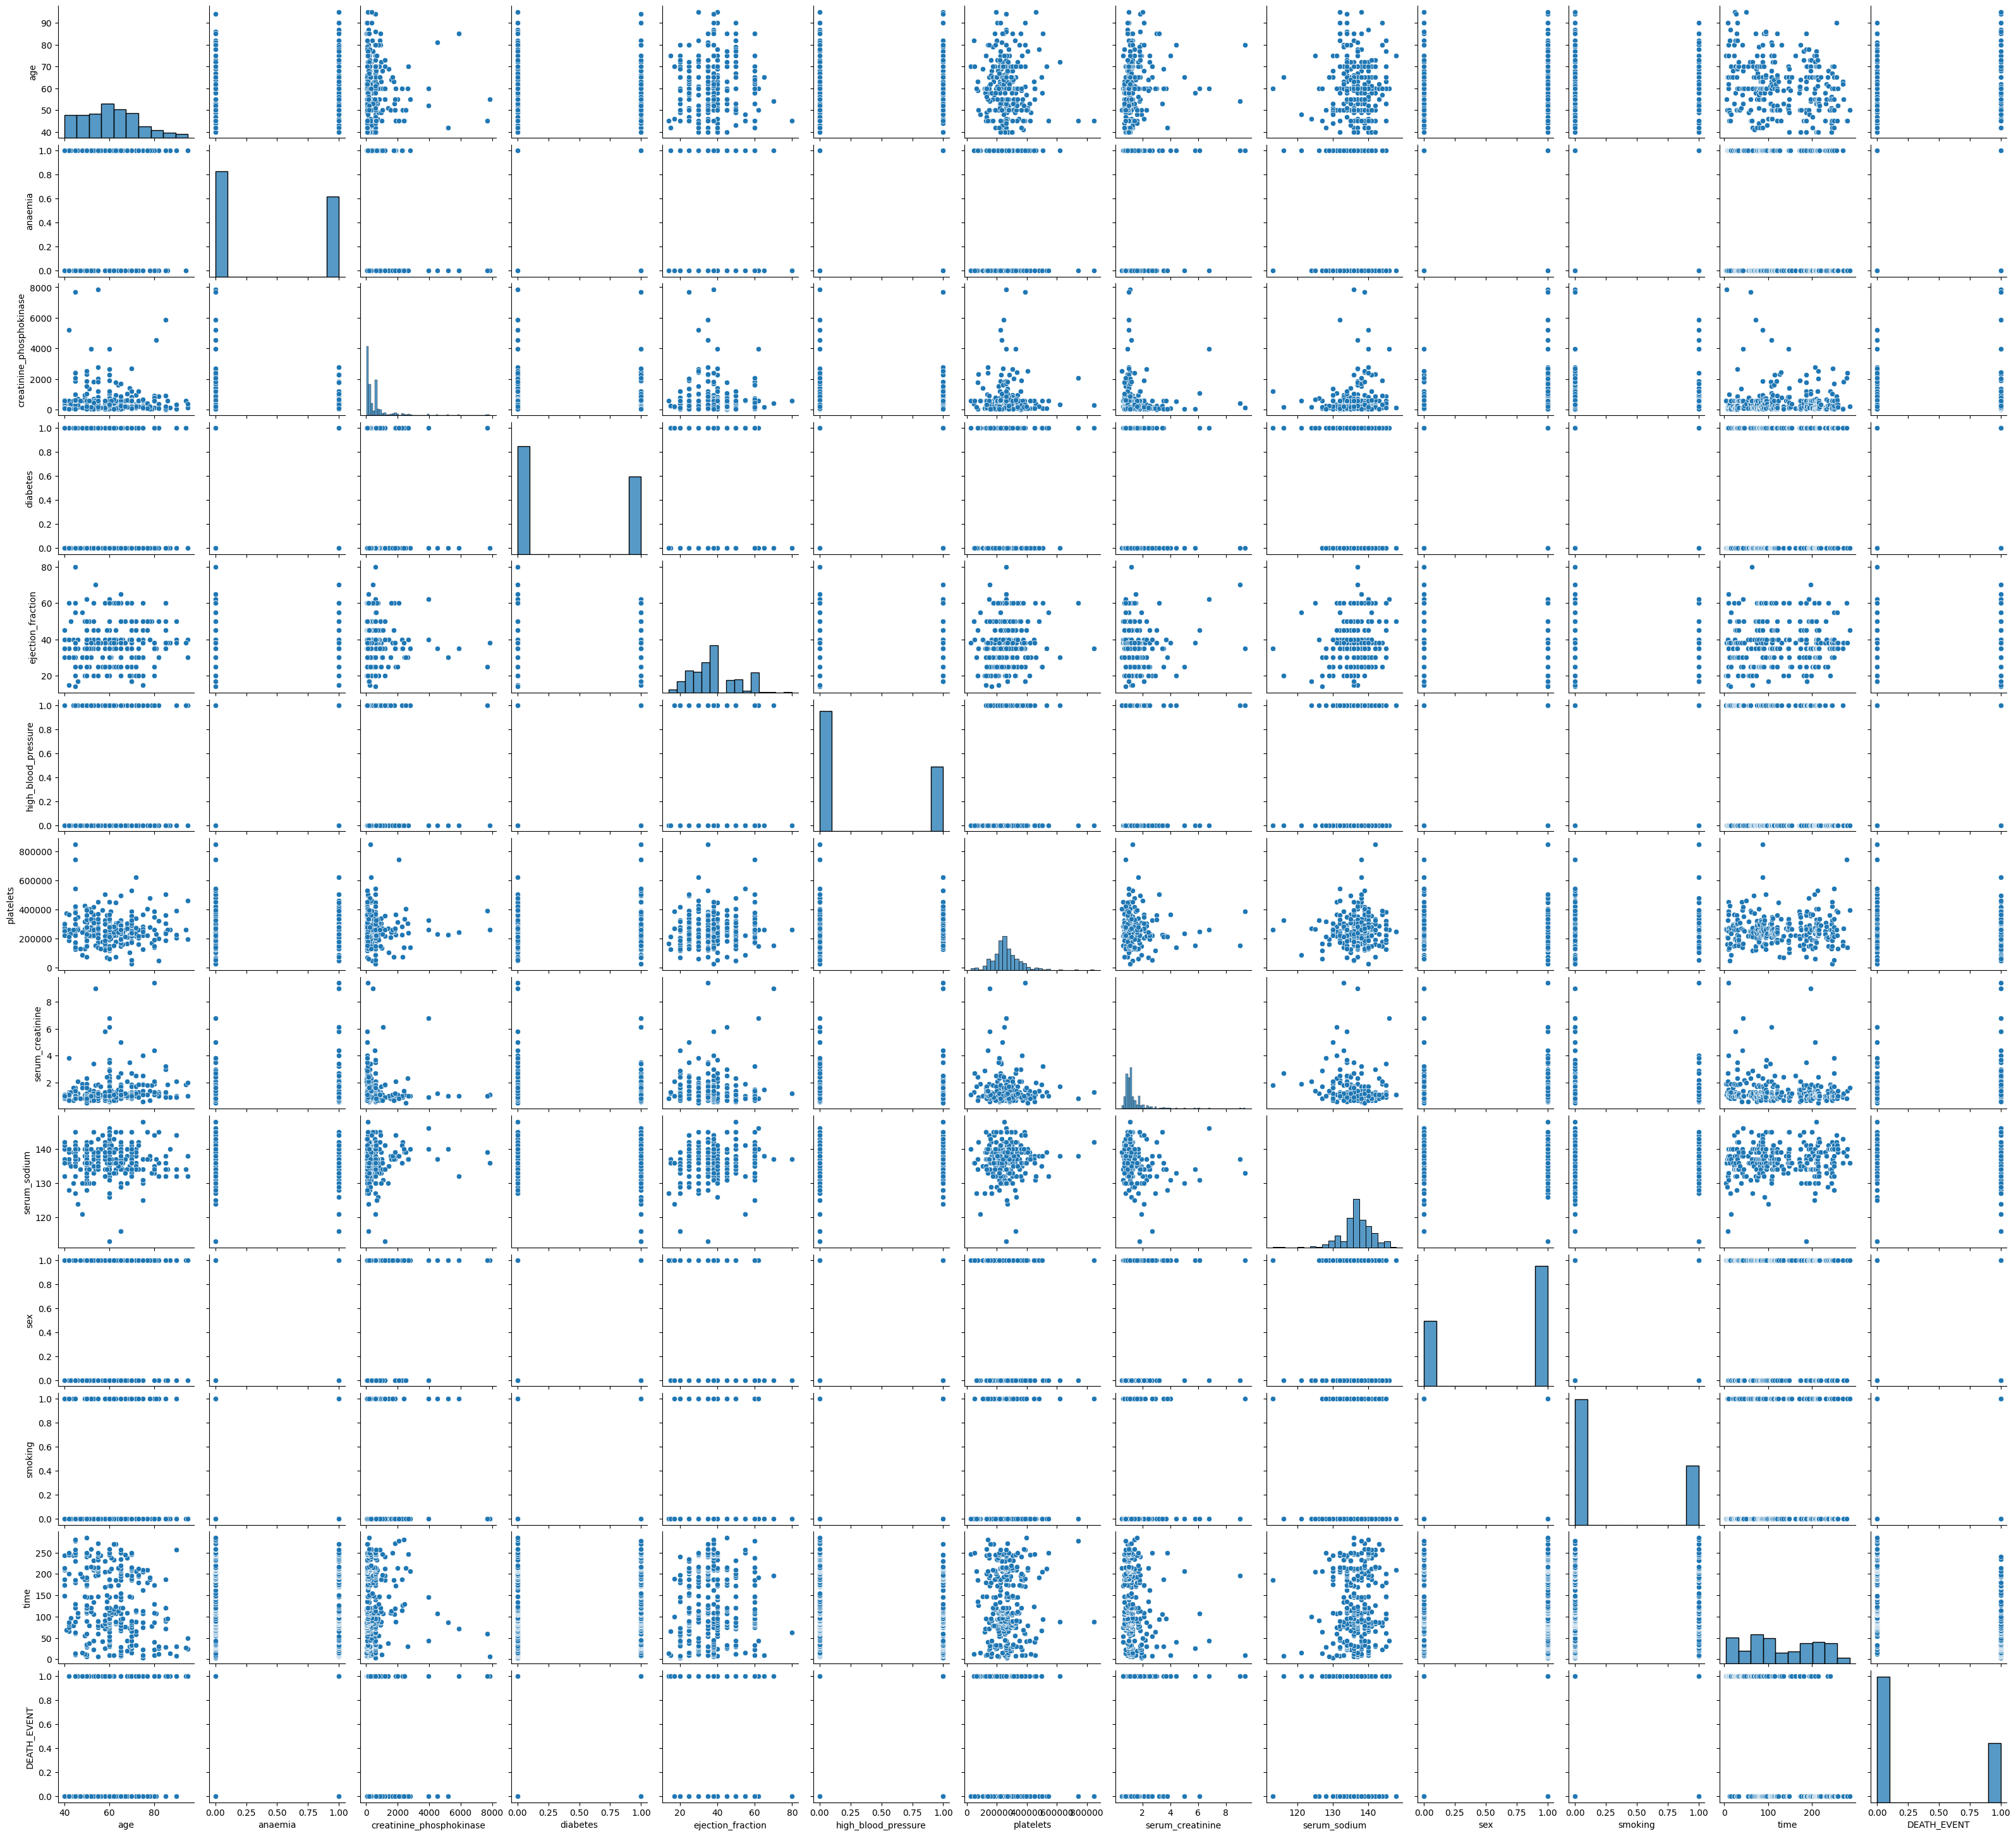

In [4]:
# Create a pair plot of all numerical variables
sns.pairplot(df)

# Adjust plot layout (optional)
plt.subplots_adjust(top=0.9)  # Adjust top margin for better title placement

# Display the plots
plt.show()

In [5]:
print(df.columns)
x=df.iloc[:,0:12]
y=df.DEATH_EVENT
print(x.columns)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')
Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.9,random_state=42)
X_test.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,60.40000,0.466667,813.533333,0.333333,37.300000,0.366667,279911.934333,1.543333,137.566667,0.766667,0.300000,126.433333
std,12.66709,0.507416,1464.468192,0.479463,10.856906,0.490133,131656.910776,1.577576,4.240066,0.430183,0.466092,75.606369
min,42.00000,0.000000,47.000000,0.000000,20.000000,0.000000,51000.000000,0.600000,130.000000,0.000000,0.000000,8.000000
25%,50.00000,0.000000,125.000000,0.000000,30.000000,0.000000,220000.000000,0.925000,135.250000,1.000000,0.000000,76.000000
50%,60.00000,0.000000,316.500000,0.000000,36.500000,0.000000,245000.000000,1.100000,137.000000,1.000000,0.000000,111.000000
75%,70.00000,1.000000,755.500000,1.000000,40.000000,1.000000,299500.000000,1.675000,139.750000,1.000000,1.000000,189.750000
max,90.00000,1.000000,7702.000000,1.000000,60.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,250.000000


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
Lmodel=LogisticRegression()
Lmodel.fit(X_train,y_train)
predictions=Lmodel.predict(X_test)
# Evaluate model accuracy
accuracy = accuracy_score(y_test, predictions)
print(Lmodel.score(X_test,y_test))
print("Logistics:", accuracy)
input_samples=X_train.sample(1)
Lmodel.predict(input_samples)


0.8
Logistics: 0.8


array([0])

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on test set
predictions = knn_model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, predictions)
print("KNN Model Accuracy:", accuracy)

KNN Model Accuracy: 0.5333333333333333


In [9]:
from sklearn.svm import SVC
# Define and train the SVM model with a linear kernel
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
# Make predictions on test set
predictions = svm_model.predict(X_test)
# Evaluate model accuracy
accuracy = accuracy_score(y_test, predictions)
print("SVM Model Accuracy:", accuracy)

SVM Model Accuracy: 0.7666666666666667


In [10]:
from sklearn.tree import DecisionTreeClassifier

D_model=DecisionTreeClassifier()
D_model.fit(X_train,y_train)
predictions=D_model.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
print(accuracy)

0.6666666666666666


In [11]:
import pickle
pickle_out = open("heart_failure_model.pkl", "wb")
pickle.dump(Lmodel, pickle_out)
pickle_out.close()